## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [6]:
hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013


In [7]:
# deal with missing data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]

In [9]:
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Users\raga\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


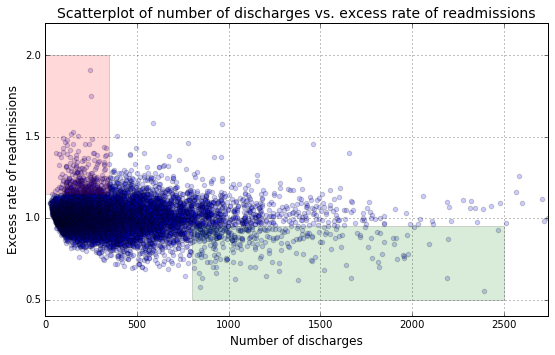

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Based on the report, hospital with capacity less than 300 are recommended to consolidate or improve their health facilities. The report is based on comparing the means of excess Readmission Ratio and the proportion of cases with excess readmission ratio more than 1 . 

In [50]:
#to remove the observations where number of discharges is zero. It is imortant to remove them because the mean of excess 
#readmission ratio will be downward biased. 
hospital = clean_hospital_read_df[['Hospital Name','Number of Discharges','Excess Readmission Ratio']]
hospital = hospital[hospital['Number of Discharges'] != 0]
hospital.head(1)

,Hospital Name,Number of Discharges,Excess Readmission Ratio
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,25,1.0914


In [45]:
# categorizing the number of discharges into two groups:less than equal to 300 and greater than 300
# categorizing the value of excess readmission ratio: less than equal to 1 and greater than 1
hospital.loc[hospital['Number of Discharges'] <= 300, 'cat'] = 1
hospital.loc[hospital['Number of Discharges'] > 300, 'cat'] = 2
hospital.loc[hospital['Excess Readmission Ratio'] <= 1, 'cat1'] = 3
hospital.loc[hospital['Excess Readmission Ratio'] > 1, 'cat1'] = 4
hospital.head(2)


,Hospital Name,Number of Discharges,Excess Readmission Ratio,cat,cat1
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,25,1.0914,1.0,4.0
1699,ATLANTIC GENERAL HOSPITAL,27,1.0961,1.0,4.0


In [51]:
hospital['IsLargerCapacity'] = hospital['Number of Discharges'] >= 300
hospital['IsExcessReadmissionRatio'] = hospital['Excess Readmission Ratio'] > 1

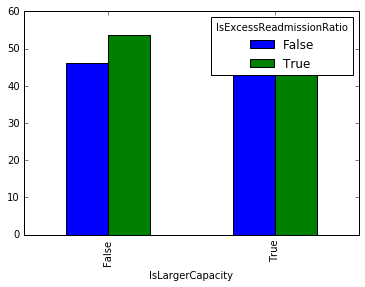

In [52]:
#Based on the report, the proportion of excess readmission ratio by cat = 1,2 can be graphically represented as:
hosp = hospital.groupby(['IsLargerCapacity']).IsExcessReadmissionRatio.value_counts()
hosp1 = hosp.unstack('IsLargerCapacity').T
hosp1.apply(lambda c:c/c.sum()*100,axis = 1).plot(kind = 'bar')

But such calculation of proportion is not appropriate because the study sample for the two category of hospital size are not equal 

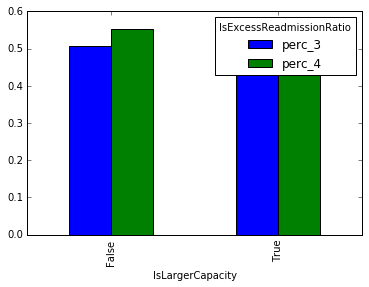

In [56]:
hosp1['perc_3']= hosp1[False]/hosp1[False].sum() 
hosp1['perc_4']= hosp1[True]/hosp1[True].sum() 
hosp2 = hosp1[['perc_3','perc_4']].plot(kind = 'bar')

From the above diagram, we observe that given the excess readmission ratio less than equal to one, the proportion of such occurances is slightly higher in hospital size of less than equal to 300 relative to hospital size greater than 300. Same result is also visible under the category of excess readmission ratio greater than one. So it is hard to confirm the practical significance(in this case positive)effect of the size of the hospital on higher readmission rates. 

Another way to check the  report is to test for the difference in the means of excess readmission ratio by hospital size categories. Such inference test can be constructed as below:

Null Hypothesis: Difference in the means of excess readmission ratio is zero between category of hospital sizes in population

Alternative Hypothesis: Difference in the means of excess readmission ratio exists in population

In [57]:
#separating the two datasets and then calculating the mean and standard deviation
hosp_cat1 = hospital[hospital.IsLargerCapacity == False]
mean_cat1 = hosp_cat1['Excess Readmission Ratio'].mean()
std_cat1 = hosp_cat1['Excess Readmission Ratio'].std()
n_cat1 = len(hosp_cat1.IsLargerCapacity)

hosp_cat2 = hospital[hospital.IsLargerCapacity == True]
mean_cat2 = hosp_cat2['Excess Readmission Ratio'].mean()
std_cat2 = hosp_cat2['Excess Readmission Ratio'].std()
n_cat2 = len(hosp_cat2.IsLargerCapacity)

mean_cat1,mean_cat2,std_cat1,std_cat2,n_cat1,n_cat2

(1.014238212180744,
 0.9998708480237515,
 0.08247820844558369,
 0.10111825848665307,
 6108,
 5389)

In [59]:
z = 2.58
SE = 0.0013
confidence_interval = ((mean_cat1 - mean_cat2) - z*SE, (mean_cat1 - mean_cat2) + z*SE)
z1 = (mean_cat1 - mean_cat2)/.0013
print("The confidence interval at 99% level of confidence:", confidence_interval)
print ("The value of z-statistic:",z1)

The confidence interval at 99% level of confidence: (0.01101336415699258, 0.01772136415699258)
The value of z-statistic: 11.051818582301985


Since the value of z1 is greater than z, and in this case the p-value will be equivalent to 0 i.e. null hypothesis is rejected. It implies that in the population there exists a difference in the means of excess readmission ratio between hospital capacity of less than equal to 300 and greater than 300.
However there should be some word of caution. The statistical result and the graphical result do not reach the same conclusion. The reason may be the number of observation here is too high which reduces the standard error. As such the test-statistic will be higher and lead to lower p-value hence rejecting the null hypothesis. 